In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

# Read the dataset

In [2]:
train_data = pd.read_csv('/Users/g.s.rajsankar/Desktop/PYTHON & ML/Python,ML & DL regex/Digit Recognizer/train.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
test_data = pd.read_csv('/Users/g.s.rajsankar/Desktop/PYTHON & ML/Python,ML & DL regex/Digit Recognizer/test.csv')

In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualizing the data

In [7]:
image = np.array(train_data.drop('label',axis=1).iloc[0])
label = train_data.iloc[0]['label']

In [8]:
label

1

In [9]:
image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [10]:
print(image.shape)

(784,)


# Visualise a digit

(-0.5, 27.5, 27.5, -0.5)

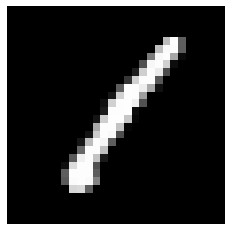

In [11]:
plt.imshow(image.reshape(28,28,1), cmap='gray')
plt.axis('off')

# Visualize Random Images

In [12]:
def visualise_random_image():
    index = np.random.randint(0,42000)
    image = np.array(train_data.drop('label',axis=1).iloc[index])
    label = train_data.iloc[index]['label']
    plt.imshow(image.reshape(28,28,1), cmap='gray')
    plt.title(label)  
    plt.axis('off')

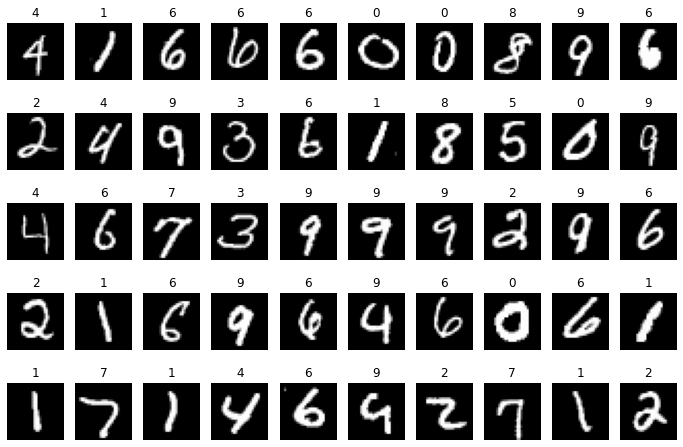

In [13]:
plt.figure(figsize=(12, 8))
for i in range(50):
    ax = plt.subplot(5, 10, i + 1)
    visualise_random_image()

# Find the number of unique labels

In [14]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

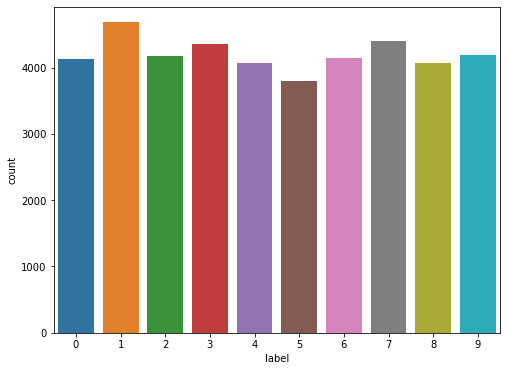

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=train_data)

# Percentage of classes in dataset

In [16]:
(train_data['label'].value_counts()/len(train_data))*100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

# Train-test split

In [17]:
X = train_data.drop('label', axis=1)
y = train_data['label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

In [19]:
print(len(X_train), len(X_test))

41160 840


# Training Models

# model1

In [20]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model1.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test))

Epoch 1/10
1287/1287 [==============================] - 8s 6ms/step - loss: 1.7024 - accuracy: 0.8621 - val_loss: 0.3906 - val_accuracy: 0.9143
Epoch 2/10
1287/1287 [==============================] - 9s 7ms/step - loss: 0.2776 - accuracy: 0.9301 - val_loss: 0.2344 - val_accuracy: 0.9512
Epoch 3/10
1287/1287 [==============================] - 8s 6ms/step - loss: 0.2015 - accuracy: 0.9468 - val_loss: 0.2094 - val_accuracy: 0.9571
Epoch 4/10
1287/1287 [==============================] - 6s 5ms/step - loss: 0.1541 - accuracy: 0.9581 - val_loss: 0.2236 - val_accuracy: 0.9536
Epoch 5/10
1287/1287 [==============================] - 6s 5ms/step - loss: 0.1393 - accuracy: 0.9622 - val_loss: 0.1759 - val_accuracy: 0.9702
Epoch 6/10
1287/1287 [==============================] - 6s 5ms/step - loss: 0.1302 - accuracy: 0.9664 - val_loss: 0.1887 - val_accuracy: 0.9548
Epoch 7/10
1287/1287 [==============================] - 6s 5ms/step - loss: 0.1123 - accuracy: 0.9704 - val_loss: 0.1901 - val_accuracy:

Text(0.5, 0, 'epochs')

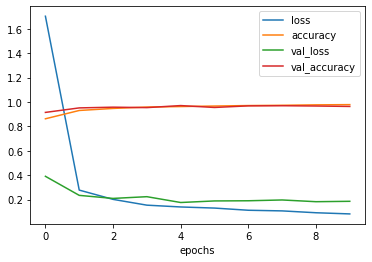

In [21]:
pd.DataFrame(non_norm_history.history).plot()
plt.xlabel('epochs')

# Normalize the data

In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

# model2

In [23]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model2.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test))

Epoch 1/10
1287/1287 [==============================] - 7s 5ms/step - loss: 0.2201 - accuracy: 0.9331 - val_loss: 0.1118 - val_accuracy: 0.9655
Epoch 2/10
1287/1287 [==============================] - 5s 4ms/step - loss: 0.0897 - accuracy: 0.9719 - val_loss: 0.0938 - val_accuracy: 0.9750
Epoch 3/10
1287/1287 [==============================] - 5s 4ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.1133 - val_accuracy: 0.9667
Epoch 4/10
1287/1287 [==============================] - 5s 4ms/step - loss: 0.0440 - accuracy: 0.9856 - val_loss: 0.0928 - val_accuracy: 0.9750
Epoch 5/10
1287/1287 [==============================] - 5s 4ms/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.0957 - val_accuracy: 0.9786
Epoch 6/10
1287/1287 [==============================] - 5s 4ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.1242 - val_accuracy: 0.9798
Epoch 7/10
1287/1287 [==============================] - 5s 4ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0879 - val_accuracy:

Text(0.5, 0, 'epochs')

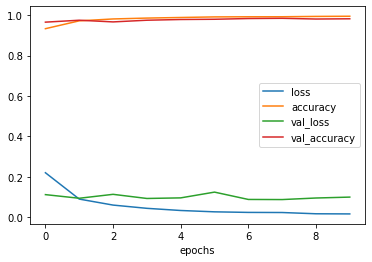

In [24]:
pd.DataFrame(norm_history.history).plot()
plt.xlabel('epochs')

# Using CONVnets
Reshape the data into image form for convnets

In [25]:
X_train = X_train.values.reshape(41160, 28, 28, 1)
X_test = X_test.values.reshape(840, 28, 28, 1)

# model3

In [26]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model3.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))


Epoch 1/10
1287/1287 [==============================] - 40s 31ms/step - loss: 0.1458 - accuracy: 0.9549 - val_loss: 0.0618 - val_accuracy: 0.9774
Epoch 2/10
1287/1287 [==============================] - 39s 30ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0499 - val_accuracy: 0.9857
Epoch 3/10
1287/1287 [==============================] - 40s 31ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0324 - val_accuracy: 0.9857
Epoch 4/10
1287/1287 [==============================] - 43s 33ms/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0361 - val_accuracy: 0.9857
Epoch 5/10
1287/1287 [==============================] - 51s 40ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0288 - val_accuracy: 0.9893
Epoch 6/10
1287/1287 [==============================] - 58s 45ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0502 - val_accuracy: 0.9869
Epoch 7/10
1287/1287 [==============================] - 47s 36ms/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.0418 -

Text(0.5, 0, 'epochs')

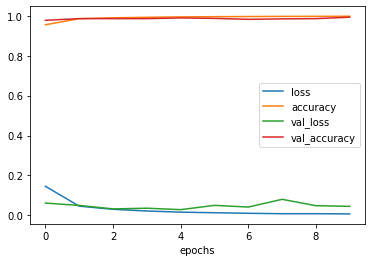

In [27]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')

# model4

In [28]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model4.fit(X_train,y_train,epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
1287/1287 [==============================] - 83s 64ms/step - loss: 0.1841 - accuracy: 0.9419 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 2/5
1287/1287 [==============================] - 89s 69ms/step - loss: 0.0630 - accuracy: 0.9808 - val_loss: 0.0446 - val_accuracy: 0.9845
Epoch 3/5
1287/1287 [==============================] - 78s 60ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0596 - val_accuracy: 0.9810
Epoch 4/5
1287/1287 [==============================] - 81s 63ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 5/5
1287/1287 [==============================] - 87s 68ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0480 - val_accuracy: 0.9845


Text(0.5, 0, 'epochs')

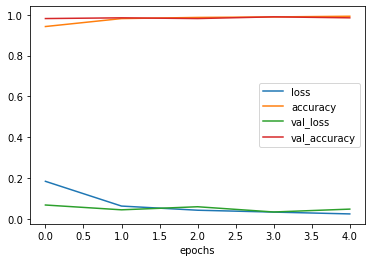

In [29]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')

# model5

In [30]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model5.fit(X_train,y_train,epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
1287/1287 [==============================] - 45s 35ms/step - loss: 0.1505 - accuracy: 0.9524 - val_loss: 0.0545 - val_accuracy: 0.9786
Epoch 2/5
1287/1287 [==============================] - 42s 32ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0418 - val_accuracy: 0.9845
Epoch 3/5
1287/1287 [==============================] - 46s 36ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0401 - val_accuracy: 0.9881
Epoch 4/5
1287/1287 [==============================] - 44s 34ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0479 - val_accuracy: 0.9821
Epoch 5/5
1287/1287 [==============================] - 43s 34ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0516 - val_accuracy: 0.9810


Text(0.5, 0, 'epochs')

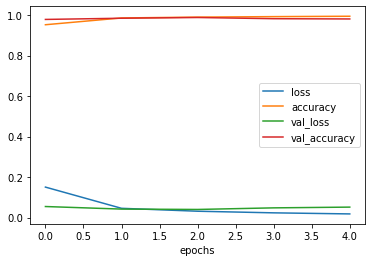

In [31]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')

# model6

In [32]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), input_shape=(28,28,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

model6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model6.fit(X_train,y_train,epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
1287/1287 [==============================] - 336s 260ms/step - loss: 0.1669 - accuracy: 0.9489 - val_loss: 0.0556 - val_accuracy: 0.9845
Epoch 2/5
1287/1287 [==============================] - 331s 257ms/step - loss: 0.0674 - accuracy: 0.9807 - val_loss: 0.0531 - val_accuracy: 0.9869
Epoch 3/5
1287/1287 [==============================] - 534s 415ms/step - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.0359 - val_accuracy: 0.9905
Epoch 4/5
1287/1287 [==============================] - 338s 262ms/step - loss: 0.0493 - accuracy: 0.9858 - val_loss: 0.0397 - val_accuracy: 0.9869
Epoch 5/5
1287/1287 [==============================] - 319s 248ms/step - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.0396 - val_accuracy: 0.9929


Text(0.5, 0, 'epochs')

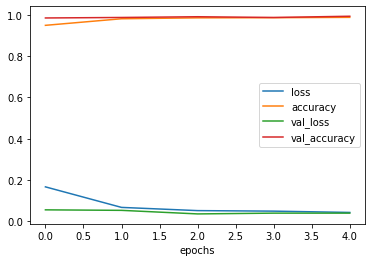

In [33]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')

In [34]:
y_probs = model6.predict(X_test)

# View the first 5 predictions
y_probs[:5]

array([[4.30599241e-13, 2.15910645e-09, 1.96402716e-08, 1.35015156e-07,
        1.44740597e-09, 8.52705684e-10, 2.04149740e-12, 9.38861835e-11,
        9.99999881e-01, 1.94163423e-08],
       [1.48828652e-14, 1.00000000e+00, 6.48400111e-10, 1.65713896e-15,
        2.84226583e-11, 7.55251475e-16, 2.36040896e-12, 2.37463993e-10,
        1.55176815e-13, 2.99795941e-13],
       [1.37491565e-14, 2.52877607e-13, 2.81550239e-12, 3.39553857e-10,
        1.09184530e-05, 2.09068127e-11, 4.48421176e-19, 3.57747979e-07,
        3.01522718e-09, 9.99988675e-01],
       [2.74491106e-14, 5.12240092e-14, 1.32998293e-10, 1.03754616e-09,
        6.40467078e-06, 2.24333302e-10, 4.02289654e-18, 3.53268638e-06,
        2.06335571e-09, 9.99990106e-01],
       [4.98827401e-15, 3.55007331e-14, 2.29387447e-11, 1.76419224e-09,
        1.62180938e-13, 4.90188931e-11, 5.56064458e-14, 8.76665802e-15,
        1.00000000e+00, 7.53130197e-11]], dtype=float32)

In [35]:
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1])

In [36]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[ 80,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 102,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  85,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  64,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   0,  58,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   1, 102,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  98,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  65,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,  81]])

In [37]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).

    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")
    cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    # colors will represent how 'correct' a class is, darker == better
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           # create enough axis slots for each class
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           # axes will labeled with class names (if they exist) or ints
           xticklabels=labels,
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

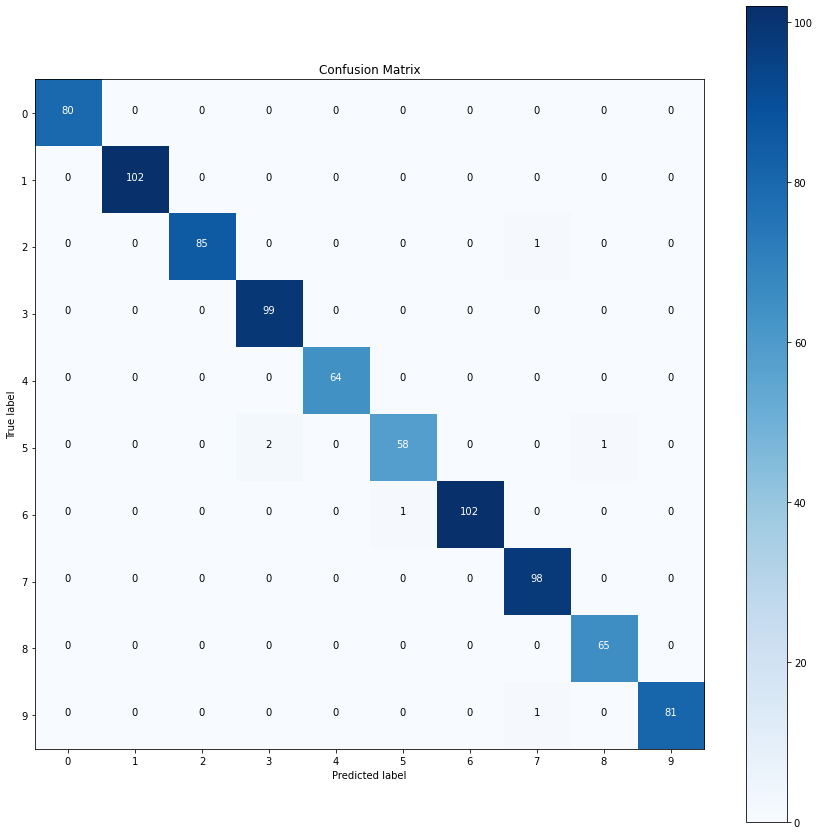

In [38]:
make_confusion_matrix(y_test, y_preds,
                      figsize=(15, 15),
                      text_size=10)

# Final model with whole data

In [39]:
X = X.values.reshape(42000,28,28,1)
X = X/255.0

In [40]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), input_shape=(28,28,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

model7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model7.fit(X,y,epochs=5)

Epoch 1/5
1313/1313 [==============================] - 314s 239ms/step - loss: 0.1595 - accuracy: 0.9521
Epoch 2/5
1313/1313 [==============================] - 332s 253ms/step - loss: 0.0657 - accuracy: 0.9803
Epoch 3/5
1313/1313 [==============================] - 332s 252ms/step - loss: 0.0547 - accuracy: 0.9842
Epoch 4/5
1313/1313 [==============================] - 344s 262ms/step - loss: 0.0442 - accuracy: 0.9873
Epoch 5/5
1313/1313 [==============================] - 336s 256ms/step - loss: 0.0420 - accuracy: 0.9882


# Predicting on the test data

In [41]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [43]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [44]:
image = np.array(test_data.iloc[0])
image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [45]:
test_data = test_data.values.reshape(28000, 28,28,1)

In [46]:
test_data = test_data/255.0

In [47]:
predictions = model7.predict(test_data)
predictions = predictions.argmax(axis=1)
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [48]:
sample_submission = pd.read_csv('/Users/g.s.rajsankar/Desktop/PYTHON & ML/Python,ML & DL regex/Digit Recognizer/submission.csv')

In [49]:
sample_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [50]:
sample_submission['Label'] = predictions

In [51]:
sample_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [52]:
sample_submission['Label'].unique()

array([2, 0, 9, 3, 7, 5, 4, 1, 6, 8])

In [53]:
sample_submission['Label'].value_counts()

1    3184
7    2903
3    2830
2    2810
6    2770
0    2769
9    2765
4    2725
8    2685
5    2559
Name: Label, dtype: int64

In [54]:
sample_submission.to_csv("/Users/g.s.rajsankar/Desktop/PYTHON & ML/Python,ML & DL regex/Digit Recognizer/Final_submission.csv",index=False)